In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [83]:
df = pd.read_csv('dataset.csv')
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [84]:
df.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [85]:
df.shape

(2200, 8)

In [86]:
df['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [87]:
df['label'].value_counts()

label
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: count, dtype: int64

In [88]:
labels = ['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee']
labels_map = {labels[i]:i+1 for i in range(len(labels))}
labels_map

{'rice': 1,
 'maize': 2,
 'chickpea': 3,
 'kidneybeans': 4,
 'pigeonpeas': 5,
 'mothbeans': 6,
 'mungbean': 7,
 'blackgram': 8,
 'lentil': 9,
 'pomegranate': 10,
 'banana': 11,
 'mango': 12,
 'grapes': 13,
 'watermelon': 14,
 'muskmelon': 15,
 'apple': 16,
 'orange': 17,
 'papaya': 18,
 'coconut': 19,
 'cotton': 20,
 'jute': 21,
 'coffee': 22}

In [89]:
df['label'] = df['label'].map(labels_map)
temp = df.copy()
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,1
1,85,58,41,21.770462,80.319644,7.038096,226.655537,1
2,60,55,44,23.004459,82.320763,7.840207,263.964248,1
3,74,35,40,26.491096,80.158363,6.980401,242.864034,1
4,78,42,42,20.130175,81.604873,7.628473,262.717340,1


In [90]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [91]:
test = temp['label']
train = temp.drop(['label'],axis = 1)
X_train, X_test, y_train, y_test = train_test_split(train,test,test_size = 0.2)

In [92]:
train.shape,test.shape

((2200, 7), (2200,))

In [93]:
mm = MinMaxScaler()
X_train_scaled = mm.fit_transform(X_train)
X_test_scaled = mm.fit_transform(X_test)

### ML ALGO 

In [94]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC 

In [95]:
X_train_df = pd.DataFrame(X_train_scaled,columns=train.columns)
X_train_df.head()

,N,P,K,temperature,humidity,ph,rainfall
0,0.371429,0.471429,0.055,0.542817,0.633219,0.555357,0.187060
1,0.000000,0.428571,0.095,0.564427,0.562132,0.674419,0.119450
2,0.257143,0.357143,0.075,0.521926,0.817562,0.486944,0.127252
3,0.192857,0.271429,0.090,0.656497,0.496900,0.368656,0.089701
4,0.228571,0.271429,0.085,0.664956,0.464861,0.274635,0.186481


In [96]:
rf = RandomForestClassifier(
    ccp_alpha=0.02,
    max_depth=2,
    min_samples_leaf=12,
    min_samples_split=2,
    n_estimators=100
)

lr = LogisticRegression(max_iter=194)

svc = SVC(C=0.5, kernel="poly", max_iter=139)

rf_val = cross_val_score(estimator=rf, X=X_train_scaled, y=y_train, cv=20, n_jobs=-1)
lr_val = cross_val_score(estimator=lr, X=X_train_scaled, y=y_train, cv=20, n_jobs=-1)
svc_val = cross_val_score(estimator=svc, X=X_train_scaled, y=y_train, cv=20, n_jobs=-1)

 Model : rf gave 0.8443181818181819 accuracy
 Model : lr gave 0.9329545454545454 accuracy
 Model : svc gave 0.9857954545454545 accuracy


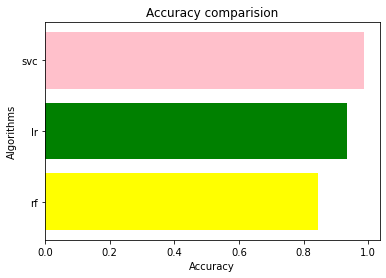

In [97]:

score_list = [rf_val,lr_val,svc_val]
model_name = ['rf','lr','svc']
x_axis=[]
for i,j in zip(score_list,model_name):
    x_axis.append(i.mean())
    print(f' Model : {j} gave {i.mean()} accuracy')
m=np.array(x_axis)
n=np.array(model_name)
plt.title("Accuracy comparision")
plt.xlabel("Accuracy")
plt.ylabel("Algorithms")
plt.barh(n,m,color=['yellow','green','pink'])
plt.show()

In [98]:
from sklearn import metrics

In [99]:
svc = SVC()
svc.fit(X_train_scaled,y_train)
svc.score(X_train_scaled,y_train)

0.9840909090909091

In [100]:
rf = RandomForestClassifier(ccp_alpha=0.02, max_depth=2, min_samples_leaf=12,
                       min_samples_split=2, n_estimators=100)

rf.fit(X_train,y_train)
rf.score(X_train,y_train)

0.8625

In [101]:
# svc = SVC(C=0.5, kernel='poly', max_iter=139, tol=1e-10)
svc.fit(X_train,y_train)
svc.score(X_train,y_train)

0.9784090909090909

In [102]:
svc.score(X_test,y_test)

0.9727272727272728

In [103]:
train.shape,temp.shape

((2200, 7), (2200, 8))

In [105]:
# 21st label is jute!

data = np.array([[83, 45, 60, 28, 70.3, 7.0, 150.9]])
prediction = svc.predict(data)
pred = prediction[0]
pred=list(labels_map.keys())[list(labels_map.values()).index(pred)]
print(pred)


data = np.array([[104,18, 30, 23.603016, 60.3, 6.7, 140.91]])
prediction = svc.predict(data)
pred = prediction[0]
pred=list(labels_map.keys())[list(labels_map.values()).index(pred)]
print(pred)

jute
coffee


## Saving the Model

In [106]:
import pickle
file = open('cropmodel2.pkl','wb')
pickle.dump(svc,file)
file.close()